In [1]:
import pandas as pd
import numpy as np
import os
import timeit
import zipfile
from numpy import genfromtxt
import pandas as pd
import seaborn as sns


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# import matplotlib.axes.Axes as axe
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [4]:
cdir = os.getcwd()
print(cdir)
zip_dir = '/home/vazumah/AIML24787-Project/'
os.chdir(zip_dir)

/home/vazumah/AIML24787-Project


In [5]:
with zipfile.ZipFile('ML_Final_Project_Data.zip', 'r') as zip_ref:
    zip_ref.extractall(os.getcwd())

In [83]:
def nucleotide_pore_data(name='mxene'):
    
    # load adenosine dataset
    A_x = genfromtxt(f'./ML Final Project Data/a_{name}.csv',delimiter=',')
    A_x_clean = A_x[1:, 1:]
    A_y = np.zeros([A_x_clean.shape[0],1])
    A_x_p= np.zeros([A_x_clean.shape[0],1])  # 'Purine'
    
    # load cytosine dataset
    C_x = genfromtxt(f'./ML Final Project Data/c_{name}.csv',delimiter=',')
    C_x_clean = C_x[1:, 1:]
    C_y = np.ones([C_x_clean.shape[0],1])
    C_x_p= np.ones([C_x_clean.shape[0],1]) #'Pyrimidine'
    
    # load guanine dataset
    G_x = genfromtxt(f'./ML Final Project Data/g_{name}.csv',delimiter=',')
    G_x_clean = G_x[1:, 1:]
    G_y = np.zeros([G_x_clean.shape[0],1])
    G_y[:]= 2
    G_x_p= np.zeros([G_x_clean.shape[0],1]) #'Purine'
    
    #load thyiamine dataset
    T_x = genfromtxt(f'./ML Final Project Data/t_{name}.csv',delimiter=',')
    T_x_clean = T_x[1:, 1:]
    T_y = np.zeros([T_x_clean.shape[0],1])
    T_y[:] = 3
    T_x_p= np.ones([T_x_clean.shape[0],1]) #'Pyrimidine'
    
    X = np.concatenate((A_x_clean, C_x_clean,G_x_clean,T_x_clean), axis=0)
    y = np.concatenate((A_y, C_y,G_y,T_y), axis=0)
    dna_class = np.concatenate((A_x_p, C_x_p,G_x_p,T_x_p), axis=0)
    Xeng = np.concatenate((X,dna_class), axis=1)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    Xeng = scaler.fit_transform(Xeng)
       
    return X, y, dna_class, Xeng

In [14]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    cov = (X.T@X)/X.shape[0]
    cov_eigs, cov_eigv=np.linalg.eig(cov)
    cov_add = np.linspace(1, X.shape[1], X.shape[1]).astype(int)
    # sort_locs = np.argsort(cov_eigs)
    # sorted_eig_vals_r = np.sort(cov_eigs, kind='heapsort')
    # sorted_eig_vals = sorted_eig_vals_r[::-1]
    # sorted_eig_vecs = cov_eigv[:, sort_locs] 
    cov_pairs=[(np.abs(cov_eigs[i]), cov_eigv[:, i], cov_add[i]) for i in range(len(cov_eigs))]
    cov_pairs.sort(key=lambda k: k[0], reverse=True)
    sorted_eig_vals = np.array([cov_pairs[i][0] for i in range(len(cov_pairs))]).reshape(-1,1)
    sorted_eig_vecs = [cov_pairs[i][1] for i in range(len(cov_pairs))]
    sorted_pairs = np.array([cov_pairs[i][2] for i in range(len(cov_pairs))]).reshape(-1,1)
    print(pd.DataFrame({"Eigenvalues": sorted_eig_vals.ravel(),"Feature Number": sorted_pairs.ravel()}))

    return (sorted_eig_vals, sorted_eig_vecs, sorted_pairs)

In [29]:
def addlabels(x,y):
    y= np.round(y,2)
    for i, x in enumerate(x):
        plt.text(x,y[i],y[i])

In [78]:
def eval(X, pore, eng=0):
    sorted_eig_vals, sorted_eig_vecs, sorted_pairs = eigendecomp(X)
    variance_explained = sorted_eig_vals/sorted_eig_vals.sum()
    var_weights= np.zeros([1, len(variance_explained)])

    for i, _ in enumerate(variance_explained):
        var_weights[0, i] = variance_explained[:i+1].sum()
        
    if eng!=0:
        tit = f'Dimensionality gain for Engineered {pore}'
    else:
        tit = f'Dimensionality gain for {pore}'
       
       
    tix = list(sorted_pairs.astype(str).ravel())
    plt.figure()
    plt.bar(range(1, len(variance_explained)+1), variance_explained.ravel()*100, alpha=0.5,
            align='center', label='individual explained variance',
            tick_label = tix)
    plt.step(range(1, len(variance_explained)+1), var_weights.reshape(-1,1)*100, where='mid',
            label='cumulative explained variance')
    
    plt.title(tit)
    # plt.set_xticklabels(sorted_pairs.to_list())
    plt.legend(loc='best')
    plt.xlabel('Dimensionality')
    plt.ylabel('Gain %')
    addlabels(range(1, len(variance_explained)+1),variance_explained.ravel()*100)
    # ax1 =plt.gca()
    # ax1.set_xticks(sorted_pairs)
    plt.show()
    
    
    return var_weights, sorted_eig_vecs

In [9]:
pores = ['gra', 'mos', 'phos', 'mxene']
my_vars = vars()

my_vars[f'X{pores[0]}'],my_vars[f'y{pores[0]}'],my_vars[f'dna_{pores[0]}'],my_vars[f'Xeng_{pores[0]}'] = 1,1,1,1

gra
   Eigenvalues  Feature Number
0     0.334729               2
1     0.047567               1


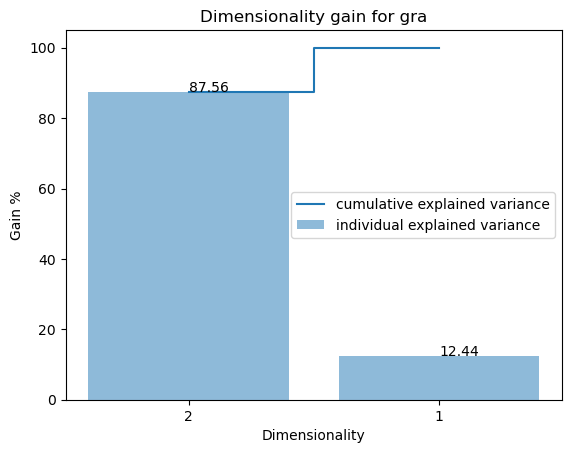

   Eigenvalues  Feature Number
0     0.788633               1
1     0.094388               3
2     0.047423               2


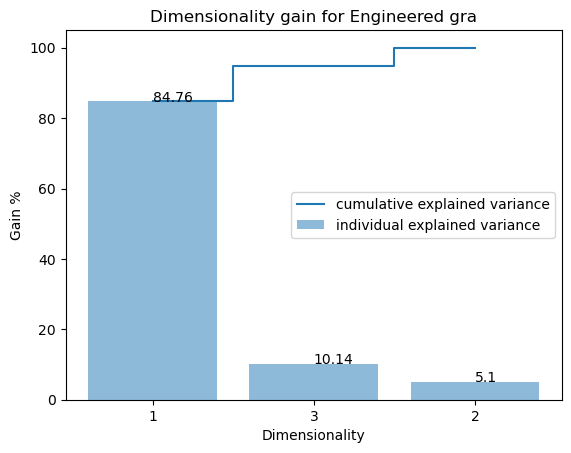

mos
   Eigenvalues  Feature Number
0     0.432829               2
1     0.027813               1


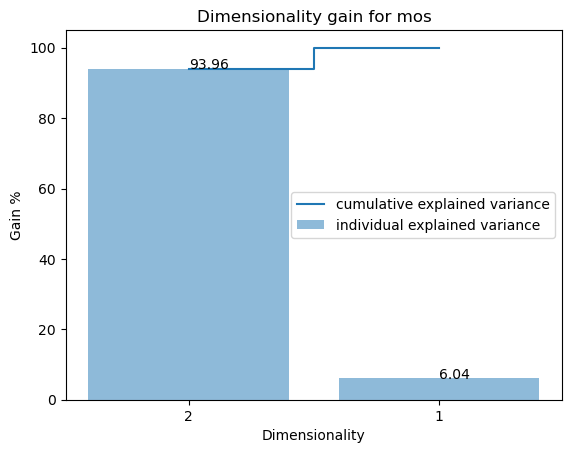

   Eigenvalues  Feature Number
0     0.788633               1
1     0.094388               3
2     0.047423               2


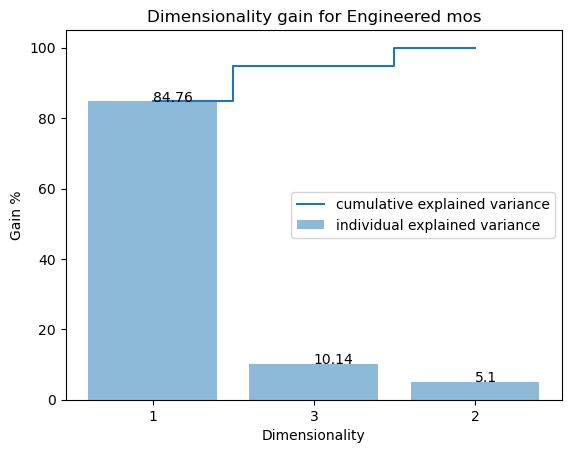

phos
   Eigenvalues  Feature Number
0     0.265445               2
1     0.036253               1


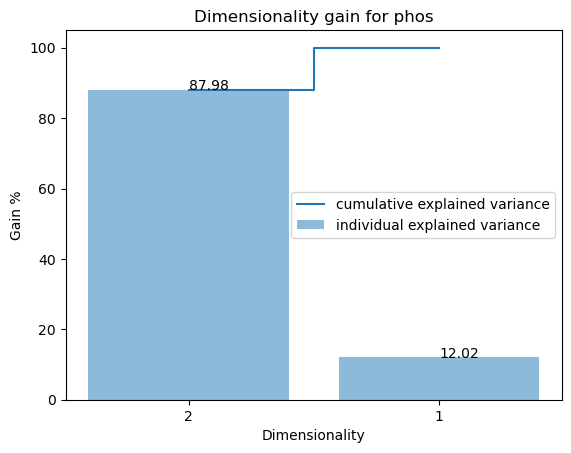

   Eigenvalues  Feature Number
0     0.788633               1
1     0.094388               3
2     0.047423               2


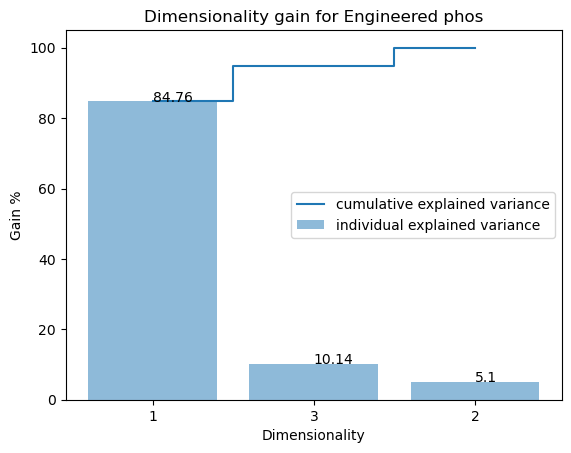

mxene
   Eigenvalues  Feature Number
0      0.34769               2
1      0.05137               1


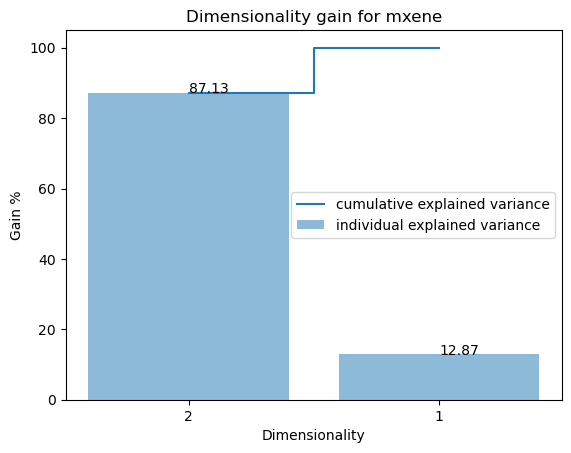

   Eigenvalues  Feature Number
0     0.788633               1
1     0.094388               3
2     0.047423               2


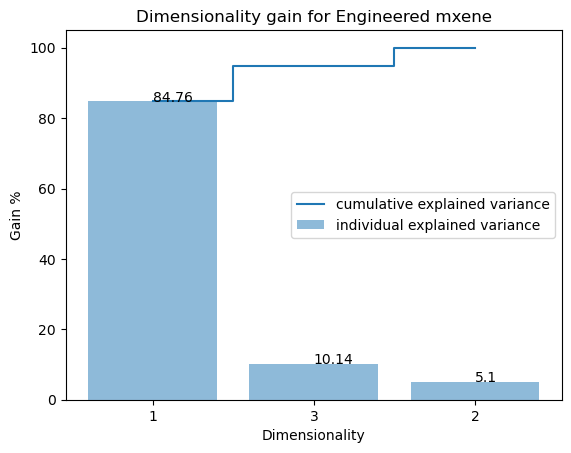

In [84]:
# Let's start for all pores
my_vars = vars()
for ind, pore in enumerate(pores):
    print(pore)
    my_vars[f'X{pore}'],my_vars[f'y{pore}'],my_vars[f'dna_{pore}'],my_vars[f'Xeng_{pore}'] = nucleotide_pore_data(name=pore)
    my_vars[f'var_weights_{pore}'],my_vars[f'sorted_eig_vecs{pore}'] =  eval(my_vars[f'X{pore}'], pore)
    my_vars[f'var_weights_{pore}_e'],my_vars[f'sorted_eig_vecs{pore}_e'] =  eval(my_vars[f'Xeng_{pores[0]}'], pore, 1)

In [59]:
ae = np.array([1,2])

In [73]:
aw2= ae.astype(str).tolist()